In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('poly.csv')
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [126]:
df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [127]:
df.tail()

,sno,Temperature,Pressure
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [128]:
df.columns

Index(['sno', 'Temperature', 'Pressure'], dtype='object')

In [129]:
df.dtypes

sno              int64
Temperature      int64
Pressure       float64
dtype: object

In [130]:
df.isna().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [131]:
df.drop(['sno'],inplace=True,axis=1)

In [132]:
x=df.iloc[:,:-1]
x

,Temperature
0,0
1,20
2,40
3,60
4,80
5,100


In [133]:
y=df.iloc[:,-1]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

Text(0.5, 1.0, 'temp-press graph')

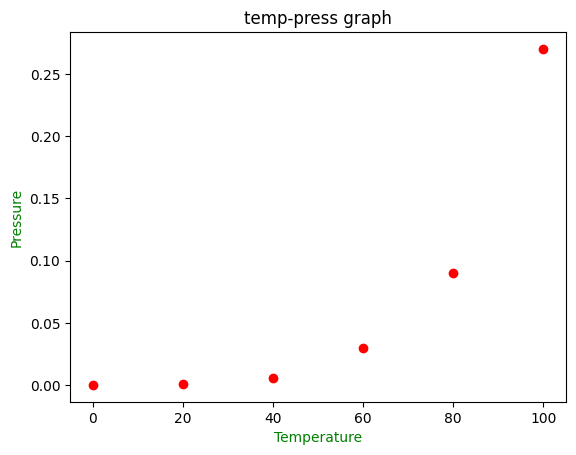

In [134]:
plt.scatter(x,y,color='r')
plt.xlabel('Temperature',color='g')
plt.ylabel('Pressure',color='g')
plt.title('temp-press graph')

In [135]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred


array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

Text(0.5, 1.0, 'temperature-pressure graph')

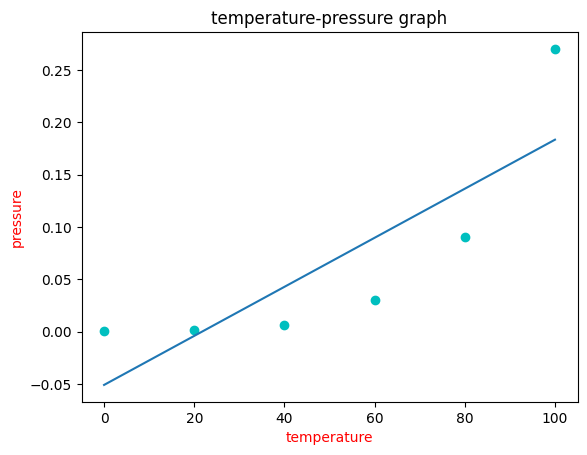

In [136]:
plt.scatter(x,y,color='c')
plt.plot(x,y_pred)
plt.xlabel('temperature',color='r')
plt.ylabel('pressure',color='r')
plt.title('temperature-pressure graph',color='k')

In [137]:
print("slope is",model.coef_)

slope is [0.002342]


In [138]:
print("constant is",model.intercept_)

constant is -0.05086666666666667


In [139]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
MAPE=mean_absolute_percentage_error(y,y_pred)
MAPE

44.775078189300416

In [140]:
score=r2_score(y,y_pred)
score

0.690349972603981

preprocessing ==import polynomial features

In [141]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3) #x expands to 3 features
x_poly=poly.fit_transform(x)  #now x contain 3 inde variable(3 columns)
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

MODEL CREATION 

In [142]:
model1=LinearRegression()
model1.fit(x_poly,y)
y_pred1=model1.predict(x_poly)
y_pred1

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

In [143]:
MAPE=mean_absolute_percentage_error(y,y_pred1)
MAPE

2.786591220832721

In [144]:
score=r2_score(y,y_pred1)
score

0.9966691251761722

Text(0.5, 1.0, 'temp-pressure graph')

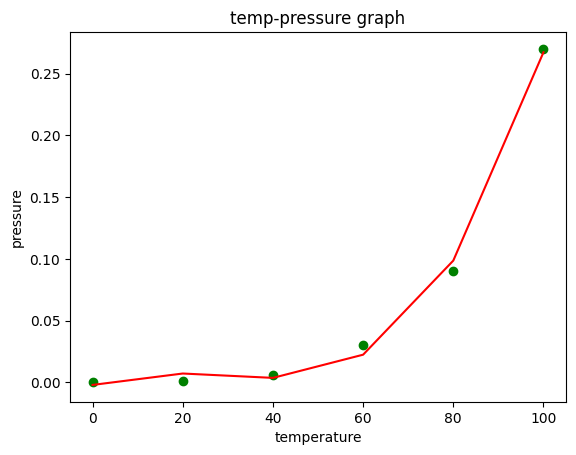

In [145]:
plt.scatter(x,y,color='g')
plt.plot(x,y_pred1,color='r')
plt.xlabel("temperature")
plt.ylabel("pressure")
plt.title('temp-pressure graph')

In [146]:
df1=pd.DataFrame({"actual_value":y,'predicted_value':y_pred,"poly_predicted":y_pred1})
df1

,actual_value,predicted_value,poly_predicted
0,0.0002,-0.050867,-0.001989
1,0.0012,-0.004027,0.007244
2,0.0060,0.042813,0.003711
3,0.0300,0.089653,0.022489
4,0.0900,0.136493,0.098656
5,0.2700,0.183333,0.267289
